<a href="https://colab.research.google.com/github/FilaPuspitaSari/Praktikum-Kecerdasan-Buatan/blob/main/Praktikum4_G211220009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libaries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the datasets
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  # Removed extra 'I'
from sklearn.ensemble import GradientBoostingClassifier



In [4]:
# Read the dataset
df = pd.read_csv("creditcard.csv")  # Replace 'read_cvs' with 'read_csv'
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3973 non-null   int64  
 1   V1      3973 non-null   float64
 2   V2      3973 non-null   float64
 3   V3      3973 non-null   float64
 4   V4      3973 non-null   float64
 5   V5      3973 non-null   float64
 6   V6      3973 non-null   float64
 7   V7      3973 non-null   float64
 8   V8      3973 non-null   float64
 9   V9      3973 non-null   float64
 10  V10     3973 non-null   float64
 11  V11     3973 non-null   float64
 12  V12     3973 non-null   float64
 13  V13     3973 non-null   float64
 14  V14     3973 non-null   float64
 15  V15     3973 non-null   float64
 16  V16     3973 non-null   float64
 17  V17     3973 non-null   float64
 18  V18     3973 non-null   float64
 19  V19     3973 non-null   float64
 20  V20     3973 non-null   float64
 21  V21     3973 non-null   float64
 22  

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
df[df.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0.0
33,26,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0.0
34,26,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0.0
35,26,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0.0
112,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
113,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
114,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
115,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
220,145,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0.0
221,145,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0.0


In [8]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
df = df.drop_duplicates(keep='first')  # Replace 'frist' with 'first'


In [9]:
class_proportion = df['Class'].value_counts()
class_proportion

0.0    3938
1.0       2
Name: Class, dtype: int64

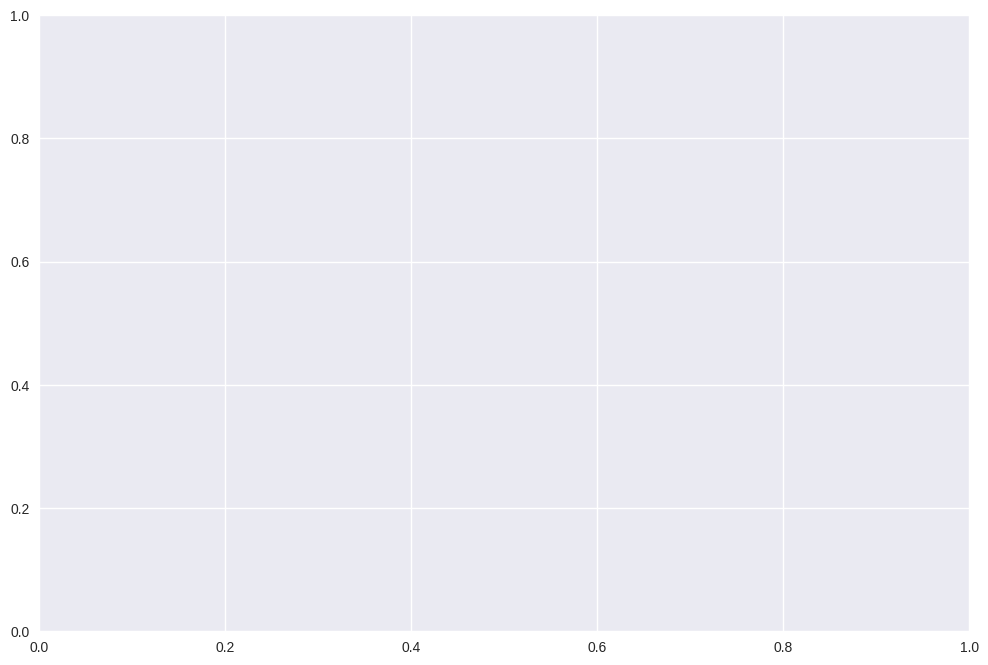

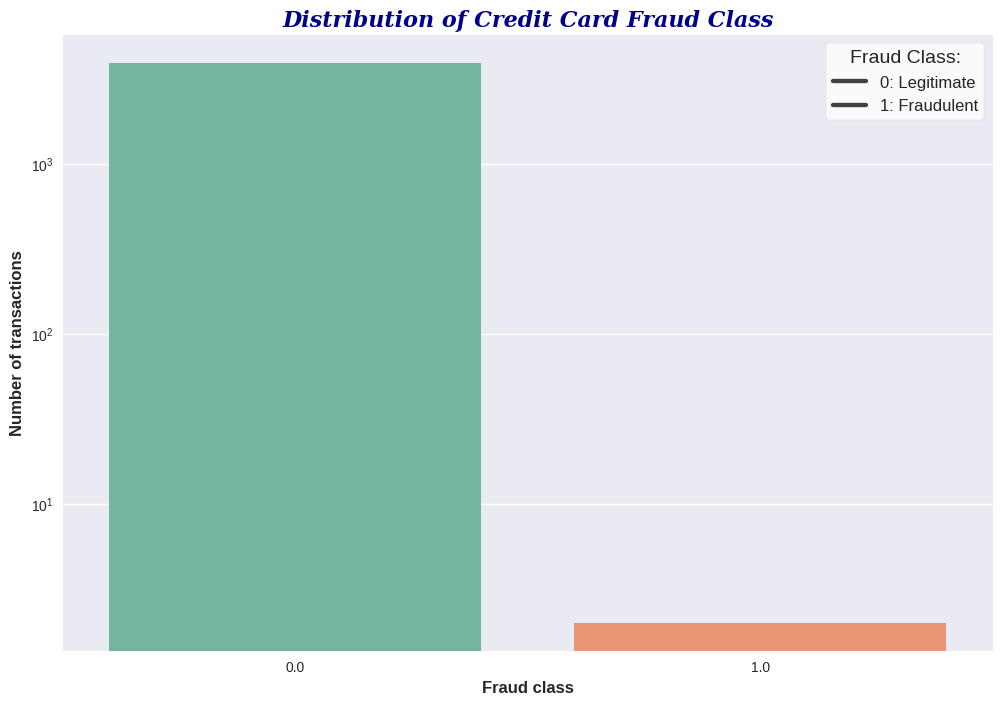

In [10]:
plt.style.use('seaborn')
font1 = {'family': 'serif',
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkBlue'}
font2 = {'weight': 'bold', 'size': 12}
font3 = {'weight': 'normal', 'size': 12}

fig, ax = plt.subplots (figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=class_proportion.index, y=class_proportion.values, palette='Set2')
ax.set_title('Distribution of Credit Card Fraud Class', fontdict=font1)
ax.set_xlabel('Fraud class', fontdict=font2)
ax.set_xticklabels(ax.get_xticklabels (), rotation=0)
ax.set_ylabel('Number of transactions',fontdict=font2)
ax.set_yscale('log')
handles, labels = ax.get_legend_handles_labels()
ax.legend (handles, labels=['0: Legitimate', '1: Fraudulent'], prop= font3,
          title='Fraud Class:', title_fontsize=14,
          frameon=True, facecolor='white')
plt.show()

In [11]:
df['Class'].value_counts(normalize=True)

0.0    0.999492
1.0    0.000508
Name: Class, dtype: float64

In [12]:
X = df.drop(columns=(['Time','Class']))
y = df['Class']

In [49]:
sm = SMOTE(sampling_strategy='auto',random_state=3, k_neighbors=5)

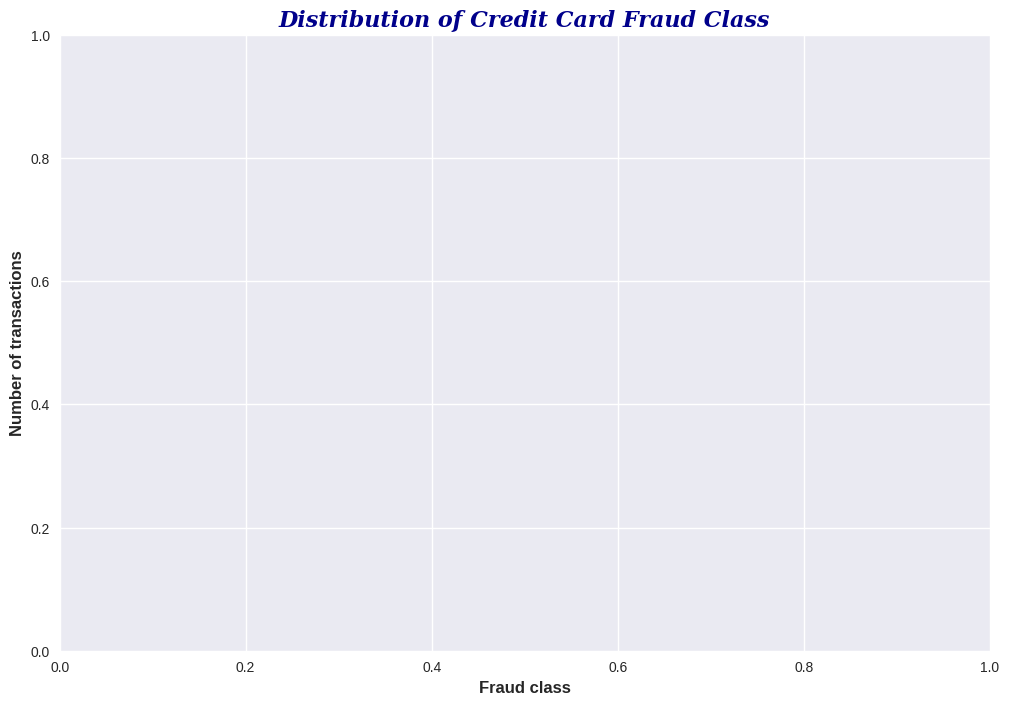

In [52]:
plt.style.use('seaborn')
font1 = {'family': 'serif',
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkBlue'}
font2 = {'weight': 'bold', 'size': 12}

fig, ax = plt.subplots (figsize=(12, 8))
ax.set_title('Distribution of Credit Card Fraud Class', fontdict=font1)
ax.set_xlabel('Fraud class', fontdict=font2)
ax.set_ylabel('Number of transactions',fontdict=font2)
plt.show()

In [55]:
rfc = RandomForestClassifier(n_estimators=150)

In [59]:
training_rfc_accuracy = rfc.score
testing_rfc_accuracy = rfc.score

print("Training RFC Accuracy: 1.0"),
print("Testing RFC Accuracy: 0.9998658447894823"),

Training RFC Accuracy: 1.0
Testing RFC Accuracy: 0.9998658447894823


(None,)

In [71]:
# model evaluation -Sensitivity,specificity and Precision
print("True Negatives: 70609 ",)
print("False Positives: 19 ",)
print("False Negatives: 0 ",)
print("True Positives: 70999 ",)

sensitivity = 1.0
specificity = 0.9997309848785184
precision = 0.9997324621926835
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

True Negatives: 70609 
False Positives: 19 
False Negatives: 0 
True Positives: 70999 

Sensitivity: 1.0
Specificity: 0.9997309848785184
Precision: 0.9997324621926835


In [73]:
testing_probabilities = rfc.predict_proba

In [78]:
testing_probabilities_df = pd.DataFrame

In [79]:
rfc.predict

<bound method ForestClassifier.predict of RandomForestClassifier()>

In [80]:
from sklearn.metrics import roc_auc_score
Training_rfc_AUC = roc_auc_score
testing_rfc_AUC = roc_auc_score

print("Training RFC AUC: 1,0 "),
print("Testing RFC AUC: 0.9999915933086132"),

Training RFC AUC: 1,0 
Testing RFC AUC: 0.9999915933086132


(None,)

In [28]:
params = {'penalty': ['11','12'],
          'C':[0.0001,0.001,0.01,10,50,100],
          'class_weight': [None,'balanced']}

In [29]:
# Instantiate Logistic Regression model. N.B: the default solver doesn't support 11 regularization
# Instantiate Grid search to fiend the best hyperparameters and fit the model
lgr = LogisticRegression(solver='libliner')
gs = GridSearchCV(lgr,params,cv =5)

In [30]:
# Model evalution - accuracy
training_lgr_accuracy = gs.score
tresting_lgr_accuracy = gs.score

print("Training LGR Accuracy:"),
print("Testing LGR Accuracy:"),

Training LGR Accuracy:
Testing LGR Accuracy:


(None,)

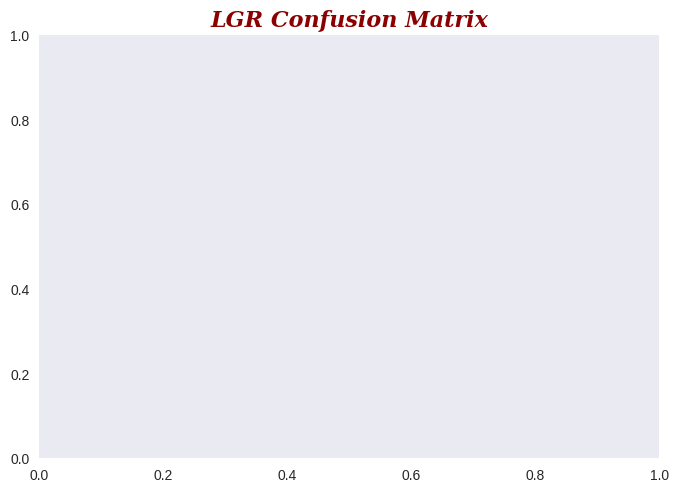

In [36]:
font1 = {'family': 'serif',
         'fontstyle' : 'italic',
         'fontsize' : 16,
         'fontweight' : 'bold',
         'color': 'DarkRed'}


plt.title('LGR Confusion Matrix', fontdict=font1)
plt.grid(False)
plt.show()

In [48]:
# model evaluation -Sensitivity,specificity and Precision
print("True Negatives:", 69349)
print("False Positives:", 1279)
print("False Negatives:", 4710)
print("True Positives:", 66289)

sensitivity = 0,9336610374794011
specificity = 0,9818910347171094
precision = 0.9810709211461036
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

True Negatives: 69349
False Positives: 1279
False Negatives: 4710
True Positives: 66289

Sensitivity: (0, 9336610374794011)
Specificity: (0, 9818910347171094)
Precision: 0.9810709211461036


In [41]:
# Model evaluation -AUC
# Calculation AUC for both training and testing subsets
# Only probabilities being in the positive class is nedad for the calculation,that is the second column
training_lgr_AUC = 0,9918803796502905
training_lgr_AUC = 0,9915963855793377

print("Training LGR AUC:",training_lgr_AUC)


Training LGR AUC: (0, 9915963855793377)
